In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
import seaborn as sns
import geopandas as gpd
import zipfile
from zipfile import ZipFile
from io import BytesIO
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import requests
import urllib
import squarify  

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib 3.0.2
matplotlib.pyplot 3.0.2
seaborn 0.9.0


In [3]:
url = 'https://health.data.ny.gov/api/views/xdss-u53e/rows.csv?accessType=DOWNLOAD'

covid_19_nys_data = pd.read_csv(url)

In [4]:
covid_19_nys_data.head(10)

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,04/05/2020,Albany,14,319,89,4244
1,04/05/2020,Allegany,1,17,8,196
2,04/05/2020,Bronx,959,14327,1628,27371
3,04/05/2020,Broome,5,76,33,607
4,04/05/2020,Cattaraugus,2,12,16,251
5,04/05/2020,Cayuga,3,11,31,385
6,04/05/2020,Chautauqua,4,15,50,237
7,04/05/2020,Chemung,9,47,50,546
8,04/05/2020,Chenango,3,46,27,212
9,04/05/2020,Clinton,3,36,14,280


In [5]:
table = covid_19_nys_data.sort_values(by=['Test Date', 'Cumulative Number of Positives'], 
                                ascending=[False, False]).drop_duplicates(subset ="County", 
                                keep = 'first').reset_index(drop=True).head(10)

table['New Positives'] = table['New Positives'].map('{:,}'.format)
table['Cumulative Number of Positives'] = table['Cumulative Number of Positives'].map('{:,}'.format)
table['Total Number of Tests Performed'] = table['Total Number of Tests Performed'].map('{:,}'.format)
table['Cumulative Number of Tests Performed'] = table['Cumulative Number of Tests Performed'].map('{:,}'.format)
table.drop(['Test Date', 'New Positives', 'Total Number of Tests Performed'], axis=1, inplace=True)


print(table.to_markdown())

|    | County      | Cumulative Number of Positives   | Cumulative Number of Tests Performed   |
|---:|:------------|:---------------------------------|:---------------------------------------|
|  0 | Queens      | 23,133                           | 40,392                                 |
|  1 | Kings       | 19,702                           | 37,609                                 |
|  2 | Nassau      | 15,616                           | 34,223                                 |
|  3 | Bronx       | 14,327                           | 27,371                                 |
|  4 | Westchester | 14,294                           | 45,353                                 |
|  5 | Suffolk     | 13,487                           | 30,902                                 |
|  6 | New York    | 10,440                           | 25,153                                 |
|  7 | Rockland    | 5,703                            | 12,844                                 |
|  8 | Richmond    | 4,579    

In [6]:
covid_19_nys_data.shape

(2170, 6)

In [7]:
print('NYS COVID-19 data as of ' +  
      covid_19_nys_data.sort_values(by='Test Date', 
      ascending=False)['Test Date'].iloc[0] + '.')

NYS COVID-19 data as of 04/05/2020.


In [8]:
current_date = covid_19_nys_data.sort_values(by='Test Date', 
      ascending=False)['Test Date'].iloc[0]

In [9]:
print(current_date)

04/05/2020


In [10]:
current_date_path = current_date.replace('/', '-')

In [11]:
current_date_path

'04-05-2020'

In [12]:
data_path = 'data/New-York-State-Statewide-COVID-19-Testing-'+ current_date_path + '.csv'

In [13]:
print(data_path)

data/New-York-State-Statewide-COVID-19-Testing-04-05-2020.csv


In [14]:
covid_19_nys_data.to_csv(data_path, index=False)

In [15]:
covid_19_nys_data.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,04/05/2020,Albany,14,319,89,4244
1,04/05/2020,Allegany,1,17,8,196
2,04/05/2020,Bronx,959,14327,1628,27371
3,04/05/2020,Broome,5,76,33,607
4,04/05/2020,Cattaraugus,2,12,16,251


In [16]:
covid_19_nys_data.tail()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
2165,03/02/2020,Washington,0,0,0,0
2166,03/02/2020,Wayne,0,0,0,0
2167,03/02/2020,Westchester,1,1,1,1
2168,03/02/2020,Wyoming,0,0,0,0
2169,03/02/2020,Yates,0,0,0,0


In [17]:
covid_19_nys_data.columns

Index(['Test Date', 'County', 'New Positives',
       'Cumulative Number of Positives', 'Total Number of Tests Performed',
       'Cumulative Number of Tests Performed'],
      dtype='object')

In [18]:
covid_19_nys_data.dtypes

Test Date                               object
County                                  object
New Positives                            int64
Cumulative Number of Positives           int64
Total Number of Tests Performed          int64
Cumulative Number of Tests Performed     int64
dtype: object

In [19]:
covid_19_nys_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Test Date                             2170 non-null   object
 1   County                                2170 non-null   object
 2   New Positives                         2170 non-null   int64 
 3   Cumulative Number of Positives        2170 non-null   int64 
 4   Total Number of Tests Performed       2170 non-null   int64 
 5   Cumulative Number of Tests Performed  2170 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 101.8+ KB


In [20]:
covid_19_nys_data.describe()

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
count,2170.000000,2170.000000,2170.000000,2170.000000
mean,60.225346,508.089401,147.839171,1426.603226
std,222.233769,2167.901035,458.147774,5038.098361
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000
50%,0.000000,2.000000,7.500000,49.500000
75%,4.000000,24.000000,38.000000,307.750000
max,2022.000000,23133.000000,5951.000000,45353.000000


In [21]:
covid_19_nys_data.isna().sum()

Test Date                               0
County                                  0
New Positives                           0
Cumulative Number of Positives          0
Total Number of Tests Performed         0
Cumulative Number of Tests Performed    0
dtype: int64

In [22]:
covid_19_nys_data.isnull().sum().sum()

0

In [23]:
covid_19_nys_data.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,04/05/2020,Albany,14,319,89,4244
1,04/05/2020,Allegany,1,17,8,196
2,04/05/2020,Bronx,959,14327,1628,27371
3,04/05/2020,Broome,5,76,33,607
4,04/05/2020,Cattaraugus,2,12,16,251


In [24]:
covid_19_nys_data['Test Date'] = pd.to_datetime(covid_19_nys_data['Test Date'], 
                                          infer_datetime_format=True)

In [25]:
covid_19_nys_data.dtypes

Test Date                               datetime64[ns]
County                                          object
New Positives                                    int64
Cumulative Number of Positives                   int64
Total Number of Tests Performed                  int64
Cumulative Number of Tests Performed             int64
dtype: object

In [26]:
covid_19_nys_data.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,2020-04-05,Albany,14,319,89,4244
1,2020-04-05,Allegany,1,17,8,196
2,2020-04-05,Bronx,959,14327,1628,27371
3,2020-04-05,Broome,5,76,33,607
4,2020-04-05,Cattaraugus,2,12,16,251


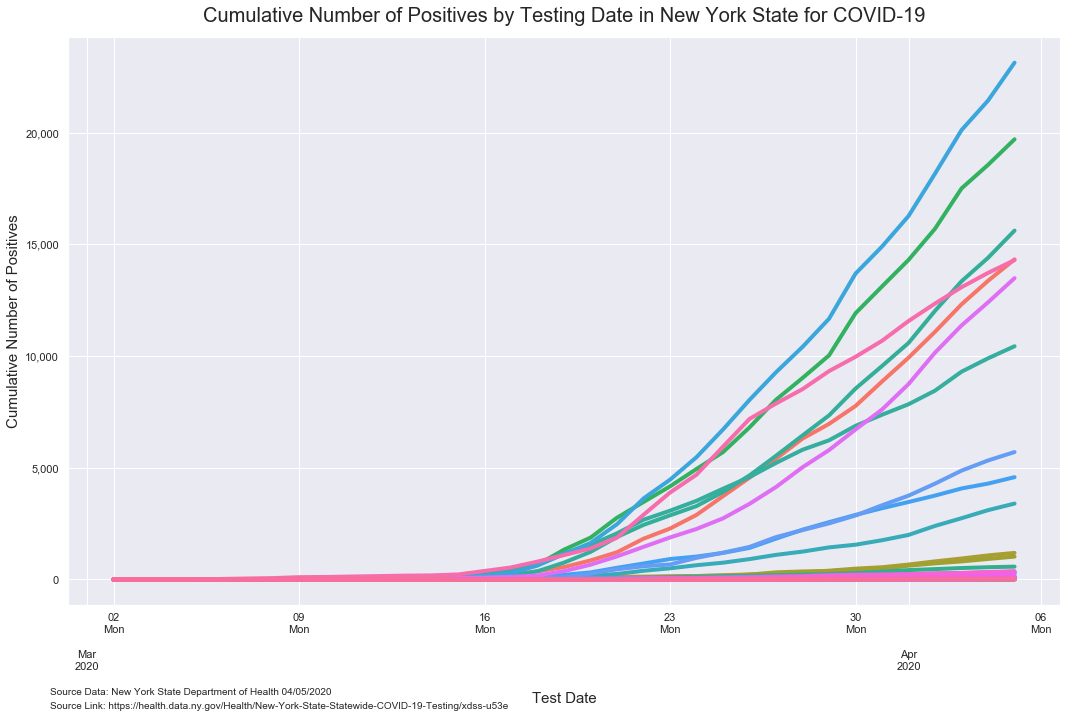

In [27]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives by Testing Date in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county')

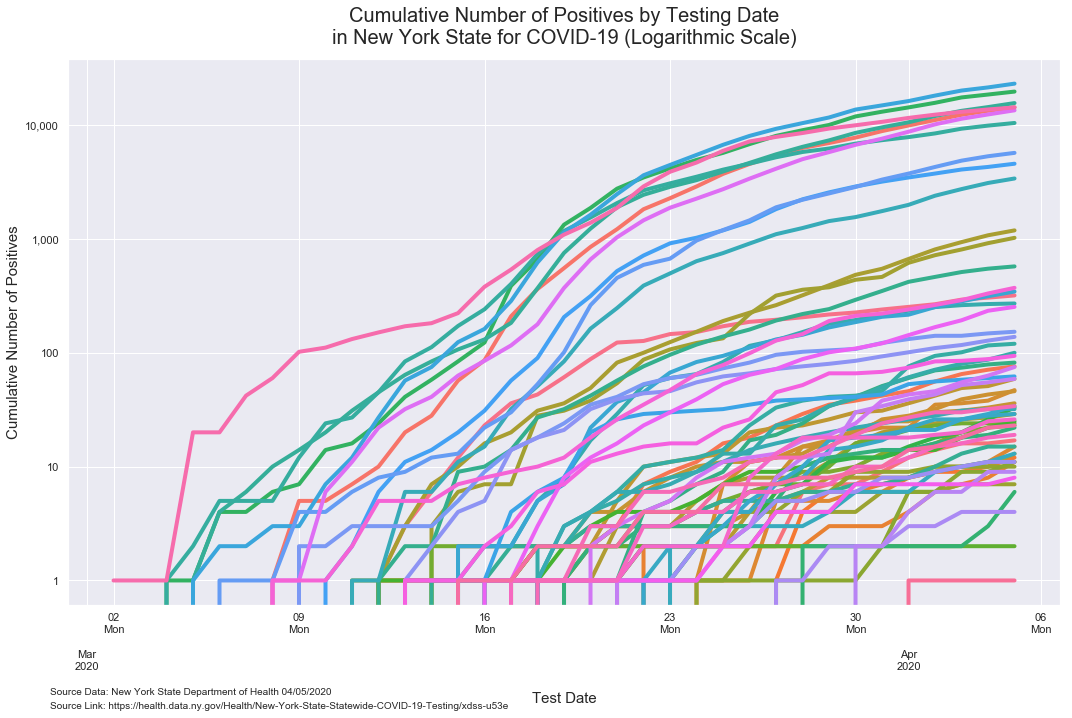

In [28]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives by Testing Date\nin New York State for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-log')

In [29]:
drop_duplicates = covid_19_nys_data.sort_values(by="Cumulative Number of Positives", ascending=False).drop_duplicates(
                                                    subset ="County", keep = 'first')
top_10 = drop_duplicates[0:10]
top10_list = list(top_10['County'])
covid_19_nys_data_top_10  = covid_19_nys_data.loc[covid_19_nys_data['County'].isin(top10_list)]

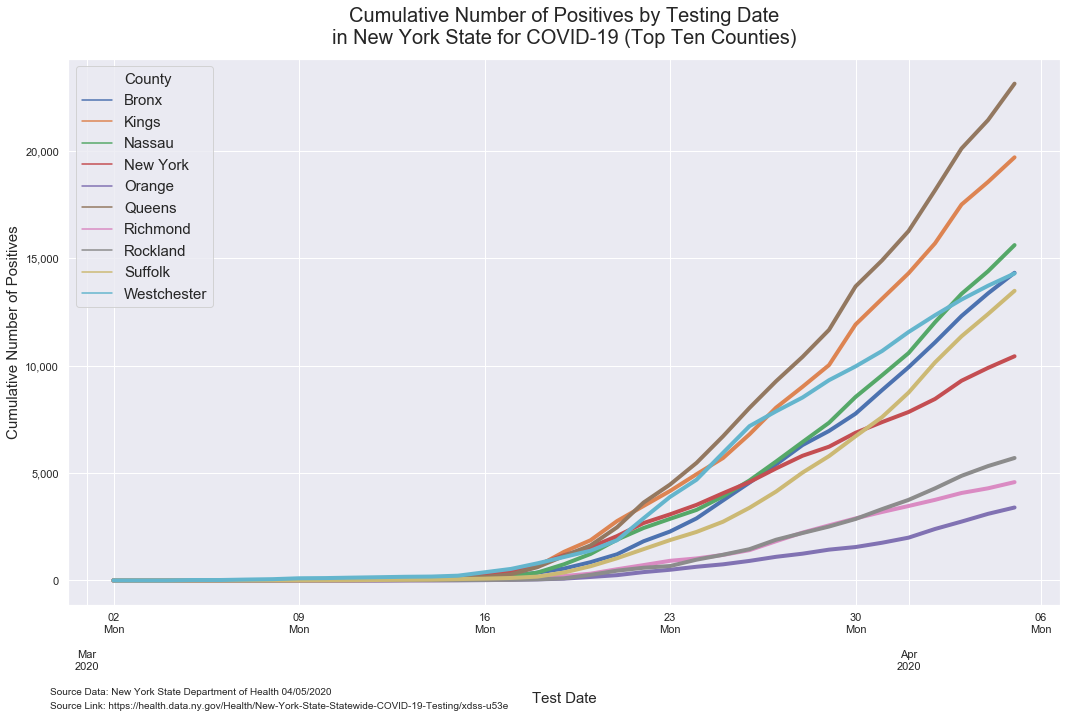

In [30]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data_top_10, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives by Testing Date\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-top-10')

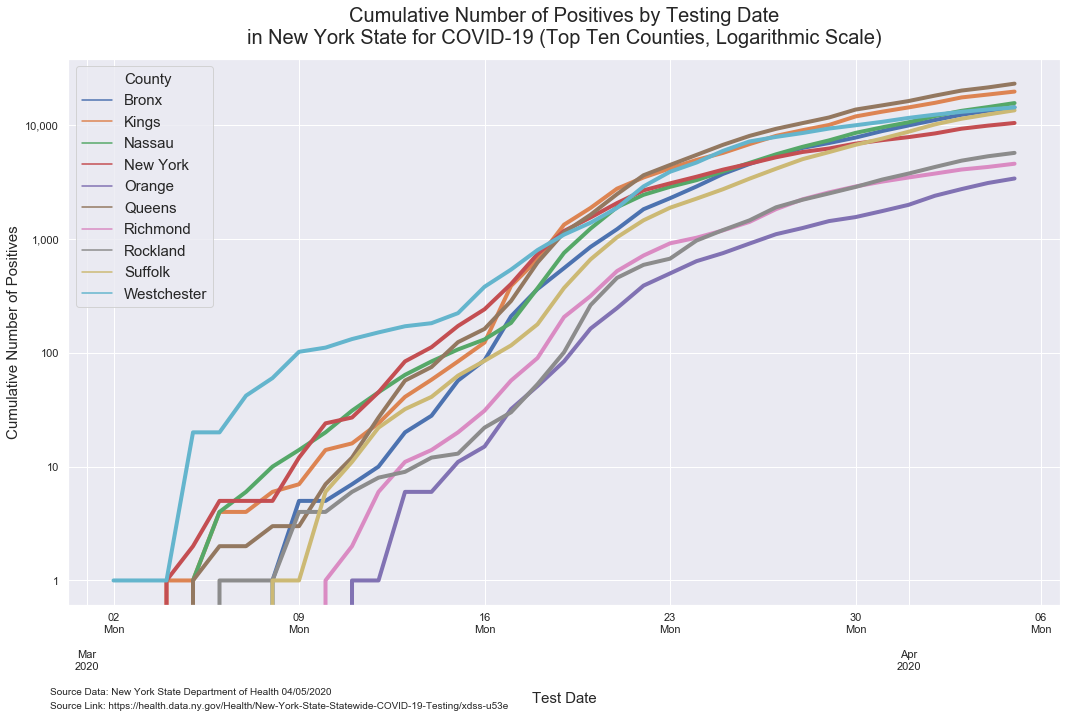

In [31]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data_top_10, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives by Testing Date\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-top-10-log')

In [32]:
from_ten_cases = covid_19_nys_data.loc[covid_19_nys_data['Cumulative Number of Positives'] >= 10]

In [33]:
from_ten_cases = from_ten_cases.sort_values(by=['Test Date', 'Cumulative Number of Positives'], ascending=[True, True], ).drop_duplicates(subset ="County", keep = 'first').reset_index(drop=True)

In [34]:
from_ten_cases = from_ten_cases[['County', 'Test Date']]
from_ten_cases.rename(columns={'Test Date': 'ten_cases_date'}, inplace=True)

In [35]:
from_ten_cases

,County,ten_cases_date
0,Westchester,2020-03-05
1,Nassau,2020-03-08
2,New York,2020-03-09
3,Kings,2020-03-10
4,Suffolk,2020-03-11
5,Queens,2020-03-11
6,Bronx,2020-03-12
7,Richmond,2020-03-13
8,Rockland,2020-03-14
9,Dutchess,2020-03-15


In [36]:
from_ten_cases = covid_19_nys_data.merge(from_ten_cases, left_on='County', right_on='County')

In [37]:
from_ten_cases = from_ten_cases.loc[from_ten_cases['Cumulative Number of Positives'] >= 10]

In [38]:
from_ten_cases

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date
0,2020-04-05,Albany,14,319,89,4244,2020-03-15
1,2020-04-04,Albany,12,305,117,4155,2020-03-15
2,2020-04-03,Albany,26,293,123,4038,2020-03-15
3,2020-04-02,Albany,14,267,105,3915,2020-03-15
4,2020-04-01,Albany,13,253,106,3810,2020-03-15
...,...,...,...,...,...,...,...
1891,2020-04-04,Wyoming,4,22,16,175,2020-03-31
1892,2020-04-03,Wyoming,3,18,11,159,2020-03-31
1893,2020-04-02,Wyoming,1,15,11,148,2020-03-31
1894,2020-04-01,Wyoming,4,14,12,137,2020-03-31


In [39]:
from_ten_cases['days_from_10_cases'] = (from_ten_cases['Test Date'] - 
                                      from_ten_cases['ten_cases_date']).dt.days

In [40]:
from_ten_cases

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date,days_from_10_cases
0,2020-04-05,Albany,14,319,89,4244,2020-03-15,21
1,2020-04-04,Albany,12,305,117,4155,2020-03-15,20
2,2020-04-03,Albany,26,293,123,4038,2020-03-15,19
3,2020-04-02,Albany,14,267,105,3915,2020-03-15,18
4,2020-04-01,Albany,13,253,106,3810,2020-03-15,17
...,...,...,...,...,...,...,...,...
1891,2020-04-04,Wyoming,4,22,16,175,2020-03-31,4
1892,2020-04-03,Wyoming,3,18,11,159,2020-03-31,3
1893,2020-04-02,Wyoming,1,15,11,148,2020-03-31,2
1894,2020-04-01,Wyoming,4,14,12,137,2020-03-31,1


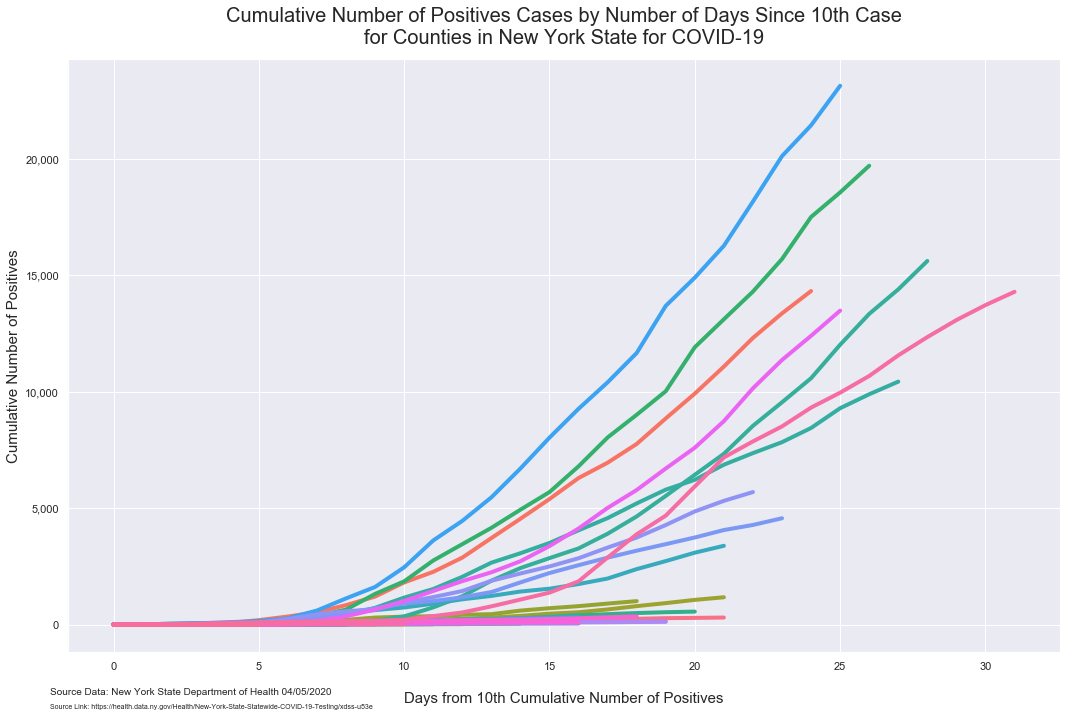

In [41]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county')

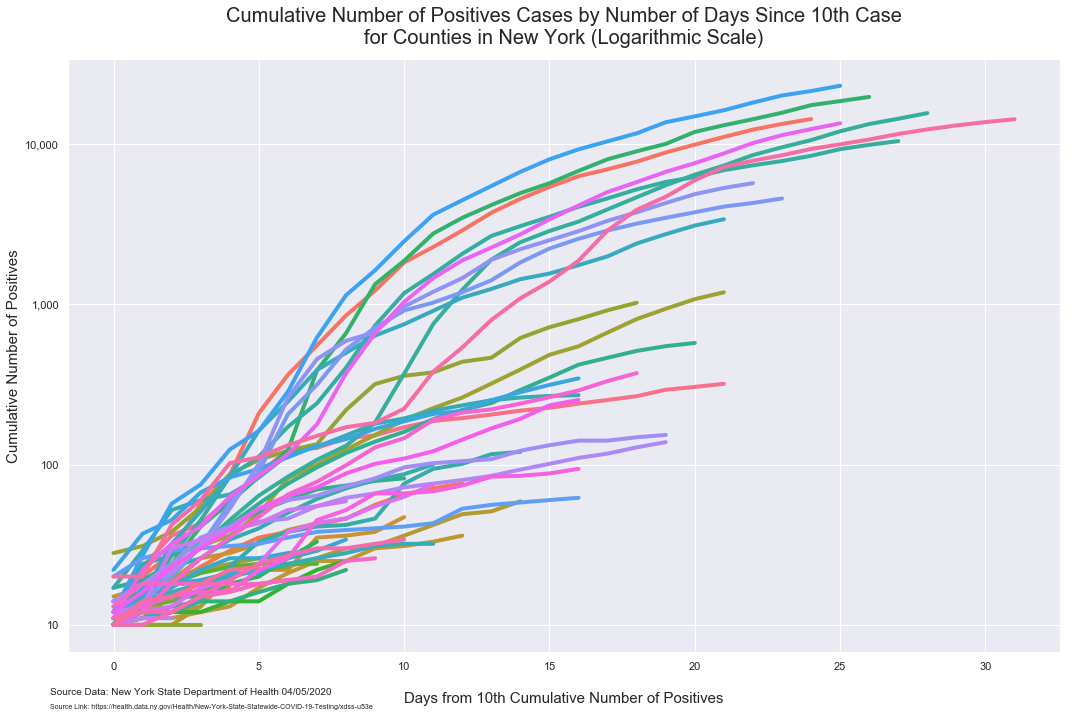

In [42]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives Cases by Number of Days Since 10th Case\nfor Counties in New York (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-log')

In [43]:
top10_list = list(top_10['County'])

from_ten_cases_top_10  = from_ten_cases.loc[from_ten_cases['County'].isin(top10_list)]

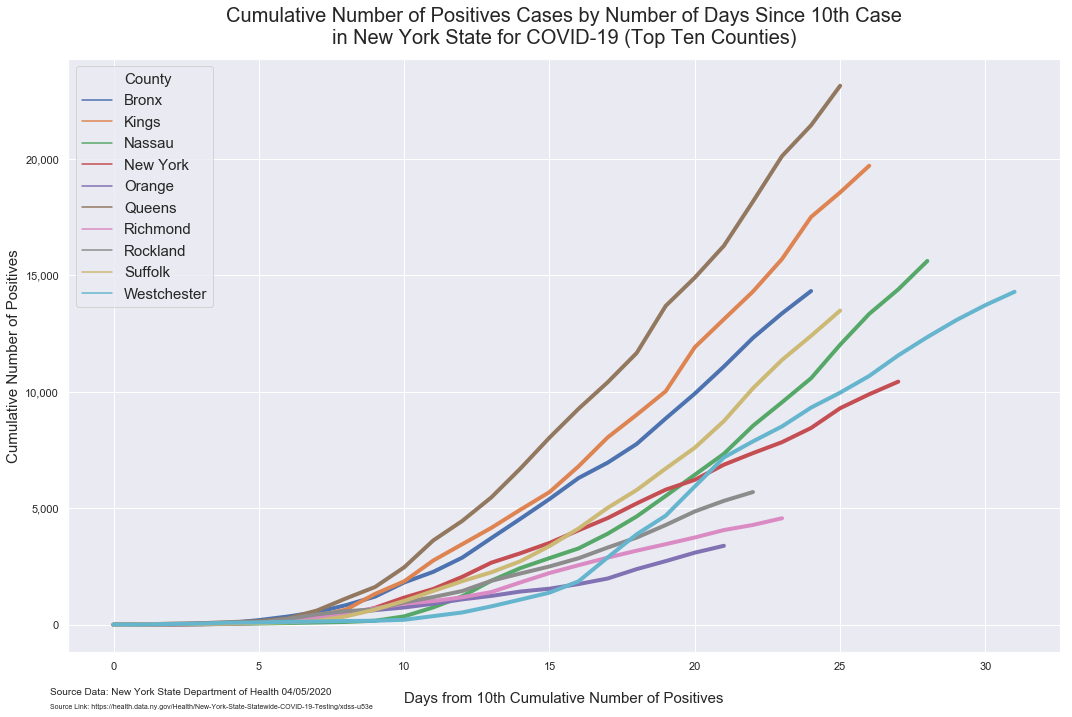

In [44]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10')

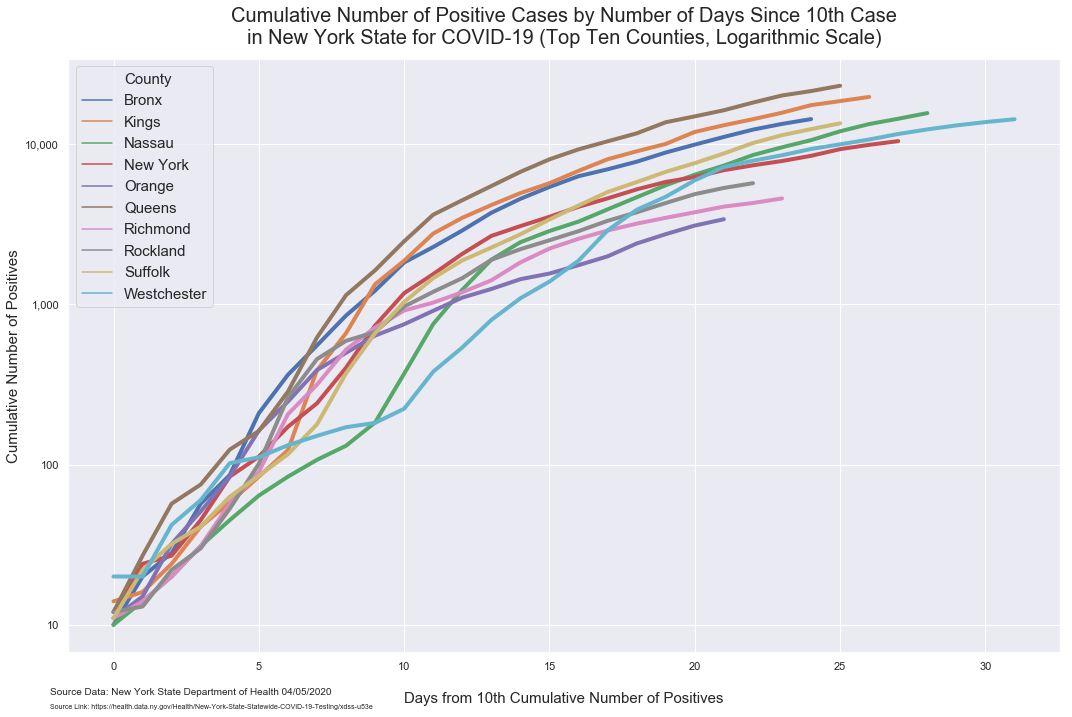

In [45]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-log')

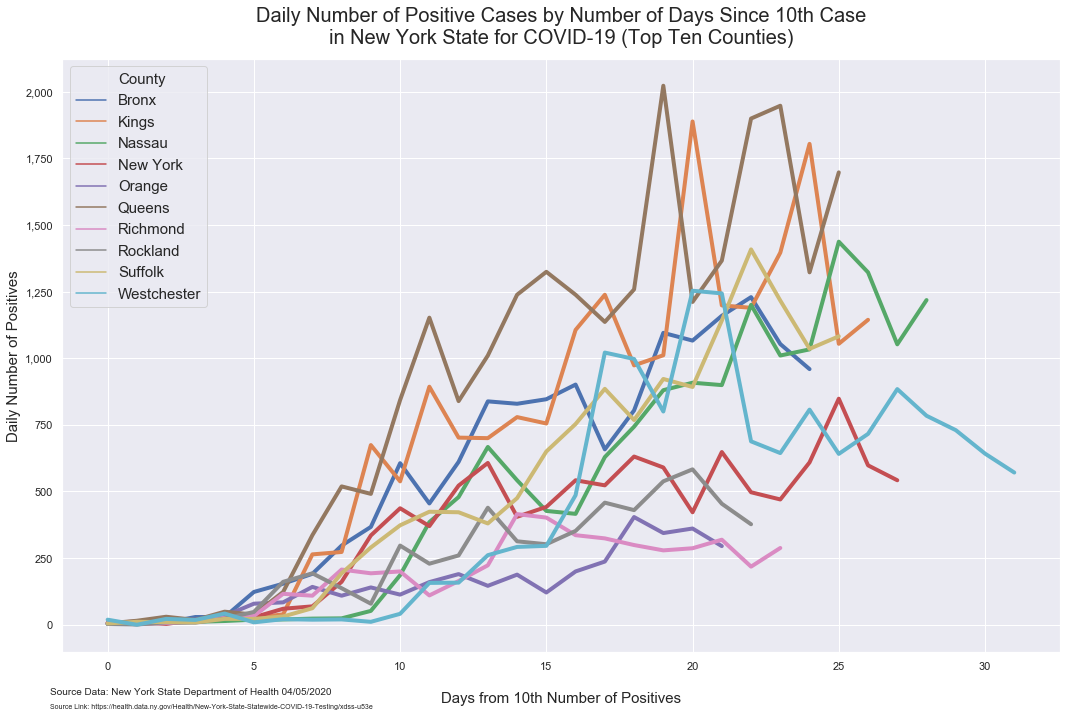

In [46]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positives', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily')

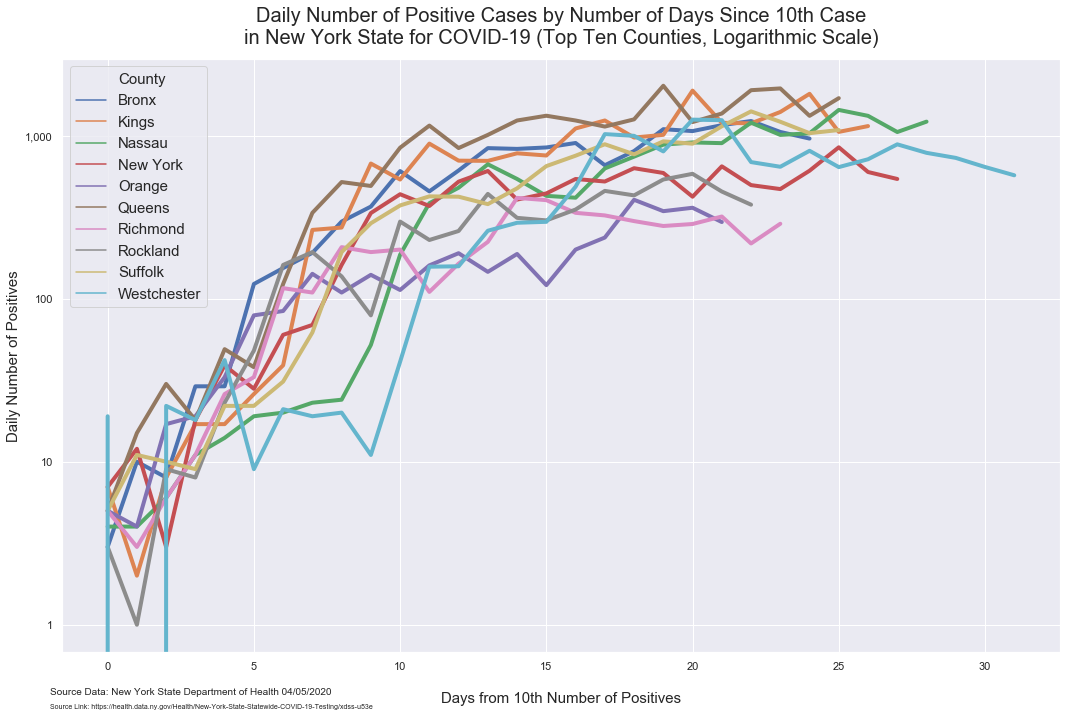

In [47]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positives', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily-log')

In [48]:
from_ten_cases_top_10_weekly = from_ten_cases_top_10.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                ascending=[True, True, True])

In [49]:
from_ten_cases_top_10_weekly = from_ten_cases_top_10_weekly.set_index('Test Date').groupby('County').resample('W').agg({'days_from_10_cases': 
                                                                    np.max, 'New Positives': np.mean})

In [50]:
from_ten_cases_top_10_weekly.reset_index(inplace=True)
from_ten_cases_top_10_weekly.rename(columns={'New Positives': 'New Positives Weekly Average'}, inplace=True)

In [51]:
from_ten_cases_top_10_weekly

,County,Test Date,days_from_10_cases,New Positives Weekly Average
0,Bronx,2020-03-15,3,12.500000
1,Bronx,2020-03-22,10,252.428571
2,Bronx,2020-03-29,17,734.000000
3,Bronx,2020-04-05,24,1052.142857
4,Kings,2020-03-15,5,12.833333
5,Kings,2020-03-22,12,483.285714
6,Kings,2020-03-29,19,937.428571
7,Kings,2020-04-05,26,1381.857143
8,Nassau,2020-03-08,0,4.000000
9,Nassau,2020-03-15,7,13.857143


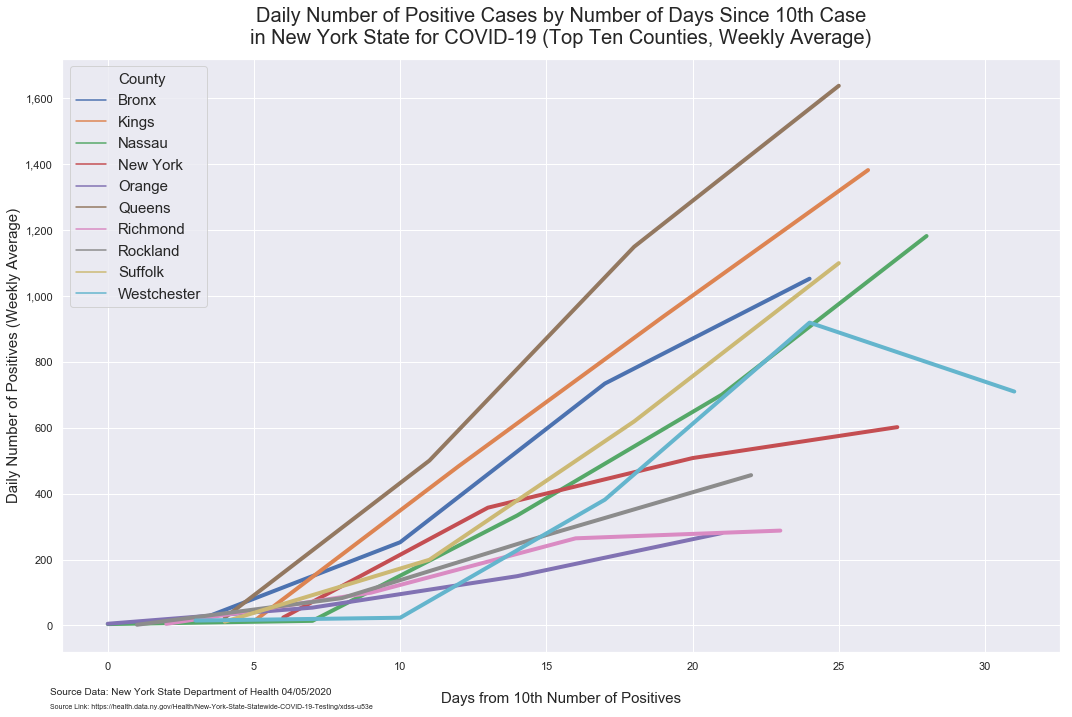

In [52]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positives (Weekly Average)', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-weekly')

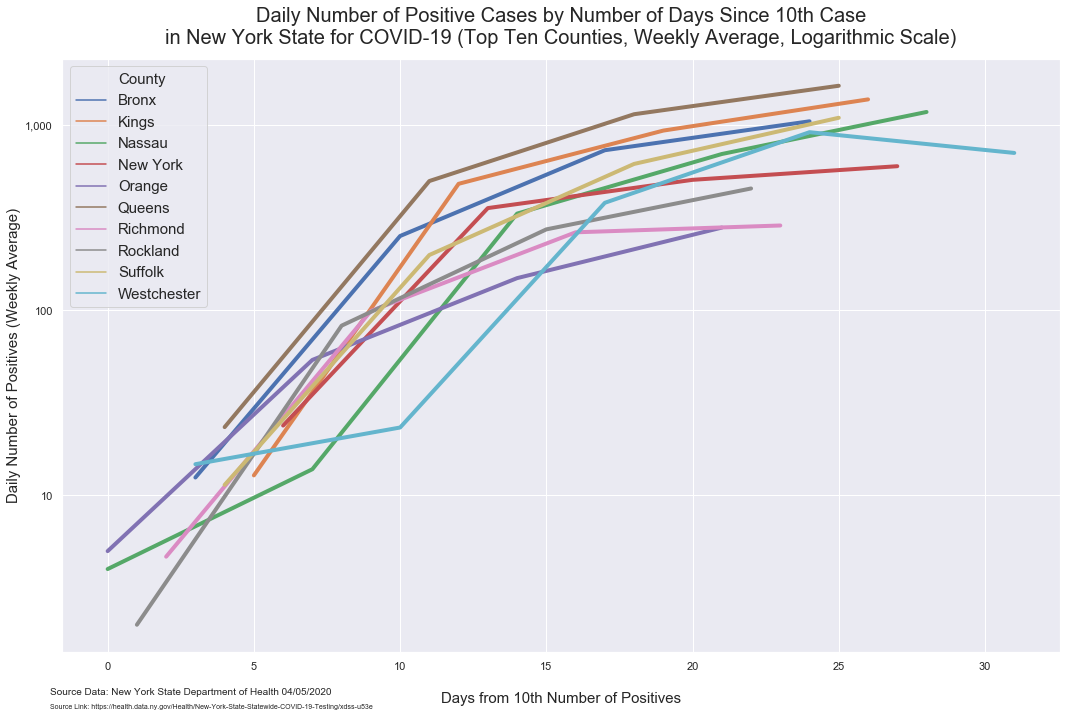

In [53]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positives (Weekly Average)', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-weekly-log')

In [54]:
covid_19_nys_data.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,2020-04-05,Albany,14,319,89,4244
1,2020-04-05,Allegany,1,17,8,196
2,2020-04-05,Bronx,959,14327,1628,27371
3,2020-04-05,Broome,5,76,33,607
4,2020-04-05,Cattaraugus,2,12,16,251


In [55]:
nys_trajectory = covid_19_nys_data.groupby('Test Date')['Cumulative Number of Positives'].sum().reset_index()

nys_trajectory.set_index('Test Date', drop=False, inplace=True)

nys_trajectory.index = pd.to_datetime(nys_trajectory.index, infer_datetime_format=True)

In [56]:
nys_trajectory['cases_diff'] = nys_trajectory['Cumulative Number of Positives'].diff()
nys_trajectory = nys_trajectory.fillna(0)

In [57]:
nys_trajectory.head()

,Test Date,Cumulative Number of Positives,cases_diff
Test Date,,,
2020-03-02,2020-03-02,1,0.0
2020-03-03,2020-03-03,1,0.0
2020-03-04,2020-03-04,3,2.0
2020-03-05,2020-03-05,25,22.0
2020-03-06,2020-03-06,36,11.0


In [58]:
nys_trajectory = nys_trajectory.set_index('Test Date').resample('W').agg({'Cumulative Number of Positives': 
                                                                    np.max, 'cases_diff': np.mean})

In [59]:
nys_trajectory.reset_index(inplace=True)
nys_trajectory.rename(columns={'cases_diff': 'cases_diff_week_avg'}, inplace=True)

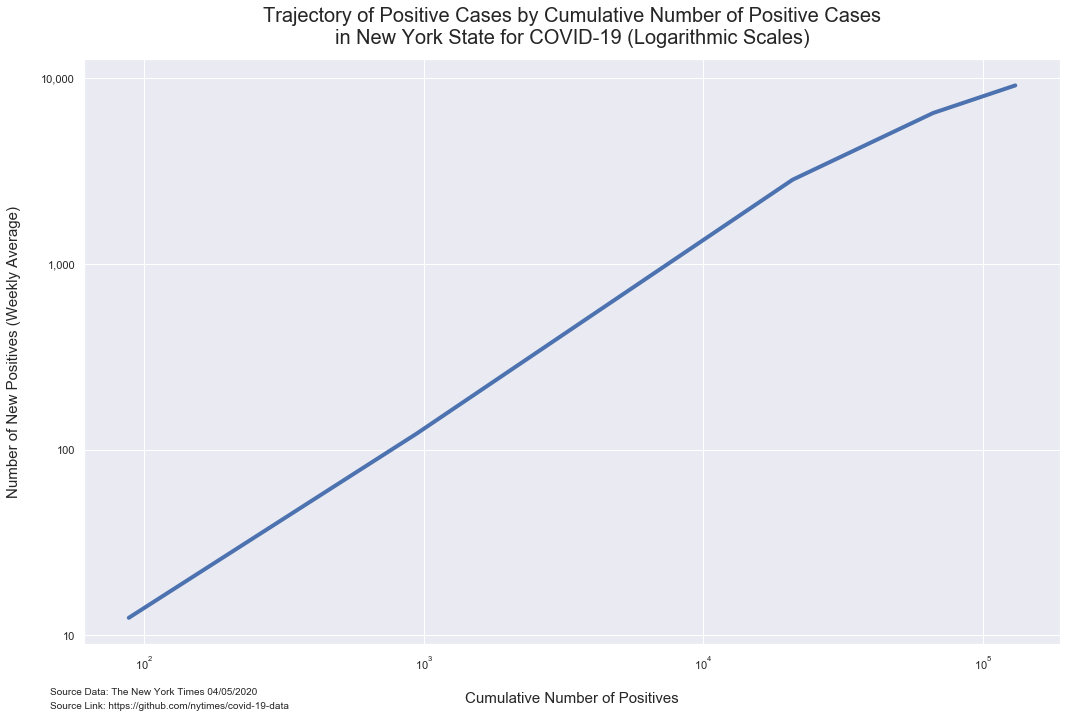

In [60]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="Cumulative Number of Positives", y="cases_diff_week_avg", data=nys_trajectory, linewidth=4)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nin New York State for COVID-19 (Logarithmic Scales)', 
          pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-log-log')

In [61]:
trajectory_plot = covid_19_nys_data.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                ascending=[True, True, True])

In [62]:
trajectory_plot.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
2108,2020-03-02,Albany,0,0,0,0
2046,2020-03-03,Albany,0,0,0,0
1984,2020-03-04,Albany,0,0,0,0
1922,2020-03-05,Albany,0,0,3,3
1860,2020-03-06,Albany,0,0,0,3


In [63]:
trajectory_plot['cases_diff'] = trajectory_plot['Cumulative Number of Positives'].diff()
trajectory_plot['cases_diff'].loc[trajectory_plot.cases_diff < 0] = 0
trajectory_plot = trajectory_plot.fillna(0)
trajectory_plot = trajectory_plot.set_index('Test Date').groupby('County').resample('W').agg({'Cumulative Number of Positives': np.max, 
                                                                                                    'cases_diff': np.mean})
trajectory_plot = trajectory_plot.loc[trajectory_plot.cases_diff > 0]
trajectory_plot.reset_index(inplace=True)
trajectory_plot.rename(columns={'cases_diff': 'cases_diff_week_avg'}, inplace=True)

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [64]:
trajectory_plot.head()

,County,Test Date,Cumulative Number of Positives,cases_diff_week_avg
0,Albany,2020-03-15,12,1.714286
1,Albany,2020-03-22,127,16.428571
2,Albany,2020-03-29,217,12.857143
3,Albany,2020-04-05,319,14.571429
4,Allegany,2020-03-15,2,0.285714


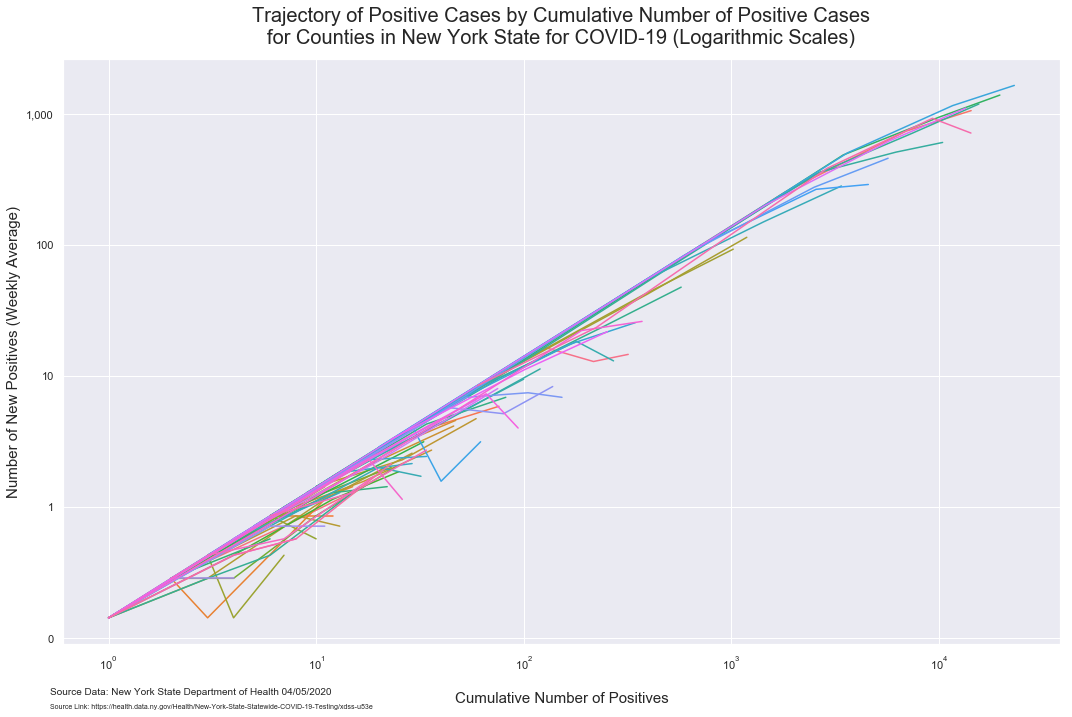

In [65]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="cases_diff_week_avg",
             hue="County",
             data=trajectory_plot)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-log-log')

In [66]:
trajectory_plot_scatter = trajectory_plot.sort_values(by=['Test Date', 'Cumulative Number of Positives'], 
                                              ascending=[False, False]).drop_duplicates(subset ="County", 
                                              keep = 'first').reset_index(drop=True)

In [67]:
trajectory_plot_scatter.tail()

,County,Test Date,Cumulative Number of Positives,cases_diff_week_avg
57,Essex,2020-04-05,7,0.428571
58,Lewis,2020-04-05,6,0.571429
59,Schuyler,2020-04-05,4,0.285714
60,Yates,2020-04-05,1,0.142857
61,Hamilton,2020-03-22,2,0.285714


In [68]:
print(list(trajectory_plot_scatter.County))

['Queens', 'Kings', 'Nassau', 'Bronx', 'Westchester', 'Suffolk', 'New York', 'Rockland', 'Richmond', 'Orange', 'Dutchess', 'Erie', 'Monroe', 'Ulster', 'Putnam', 'Albany', 'Onondaga', 'Sullivan', 'Saratoga', 'Schenectady', 'Niagara', 'Oneida', 'Tompkins', 'Madison', 'Broome', 'Steuben', 'Rensselaer', 'Columbia', 'St. Lawrence', 'Chemung', 'Chenango', 'Clinton', 'Otsego', 'Wayne', 'Jefferson', 'Ontario', 'Delaware', 'Oswego', 'Warren', 'Herkimer', 'Greene', 'Genesee', 'Wyoming', 'Livingston', 'Washington', 'Allegany', 'Chautauqua', 'Montgomery', 'Cortland', 'Orleans', 'Cattaraugus', 'Cayuga', 'Fulton', 'Schoharie', 'Franklin', 'Seneca', 'Tioga', 'Essex', 'Lewis', 'Schuyler', 'Yates', 'Hamilton']


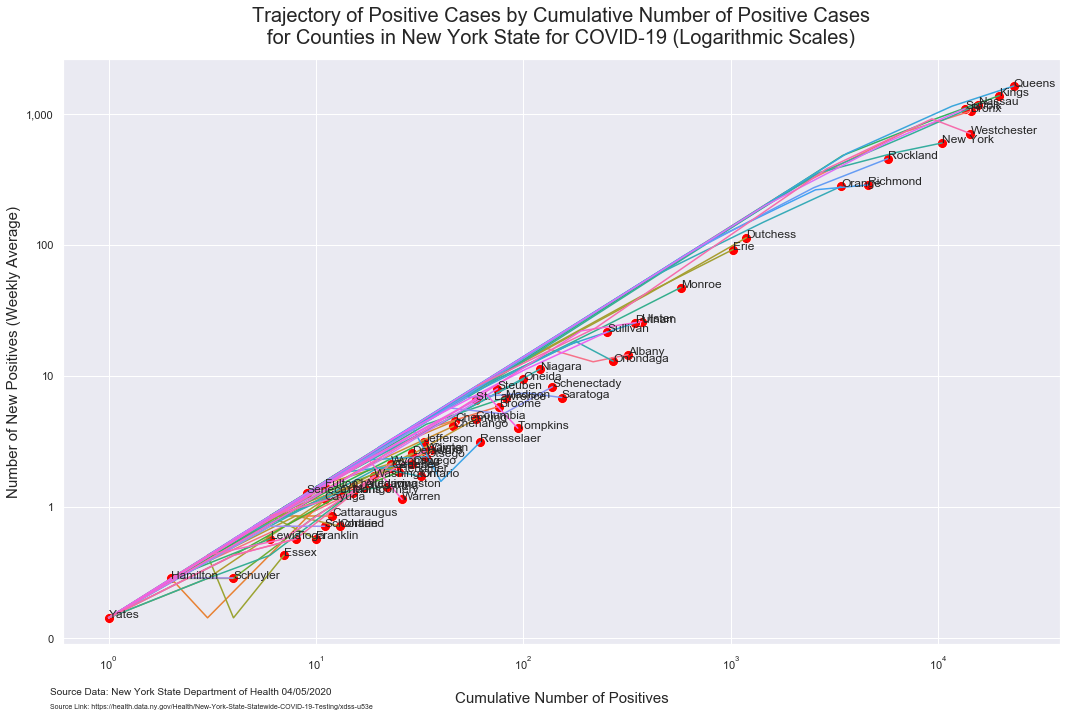

In [69]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="cases_diff_week_avg",
             hue="County",
             data=trajectory_plot)

sns.scatterplot(x="Cumulative Number of Positives", y="cases_diff_week_avg", 
             data=trajectory_plot_scatter, s=100, ax=ax1, color='red')


x = trajectory_plot_scatter.cases_diff_week_avg
z = trajectory_plot_scatter['Cumulative Number of Positives']
n = trajectory_plot_scatter.County
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5
#ax1.set_xbound(lower=100)

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-log-log-scatter')

In [70]:
top10_list = list(top_10['County'])

trajectory_plot_top_10  = trajectory_plot.loc[trajectory_plot['County'].isin(top10_list)]

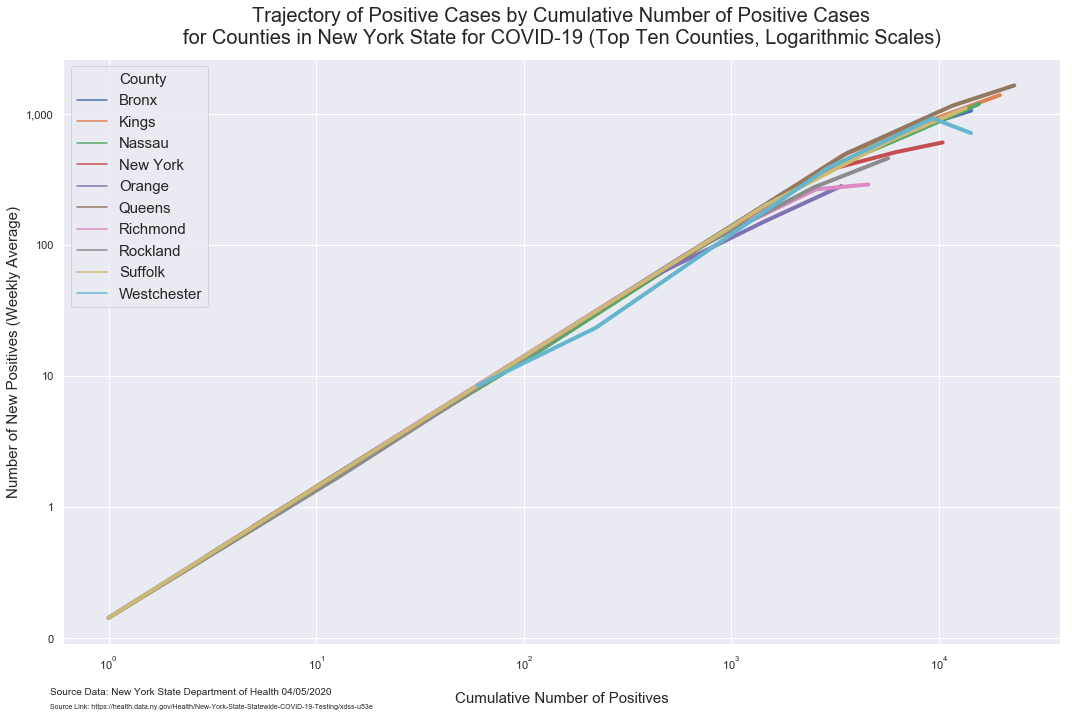

In [71]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="cases_diff_week_avg",
             hue="County",
             data=trajectory_plot_top_10, linewidth=4)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend(fontsize=15)
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Top Ten Counties, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-top-ten-log-log')

In [72]:
covid_19_nys_data_total = covid_19_nys_data.groupby('Test Date')['Cumulative Number of Positives'].sum().reset_index()

covid_19_nys_data_total.set_index('Test Date', drop=False, inplace=True)

covid_19_nys_data_total.index = pd.to_datetime(covid_19_nys_data_total.index, infer_datetime_format=True)

In [73]:
covid_19_nys_data_total.head(10)

,Test Date,Cumulative Number of Positives
Test Date,,
2020-03-02,2020-03-02,1
2020-03-03,2020-03-03,1
2020-03-04,2020-03-04,3
2020-03-05,2020-03-05,25
2020-03-06,2020-03-06,36
2020-03-07,2020-03-07,60
2020-03-08,2020-03-08,88
2020-03-09,2020-03-09,151
2020-03-10,2020-03-10,195


In [74]:
covid_19_nys_data_total.tail(10)

,Test Date,Cumulative Number of Positives
Test Date,,
2020-03-27,2020-03-27,52318
2020-03-28,2020-03-28,59513
2020-03-29,2020-03-29,66497
2020-03-30,2020-03-30,75795
2020-03-31,2020-03-31,83712
2020-04-01,2020-04-01,92381
2020-04-02,2020-04-02,102863
2020-04-03,2020-04-03,113704
2020-04-04,2020-04-04,122031


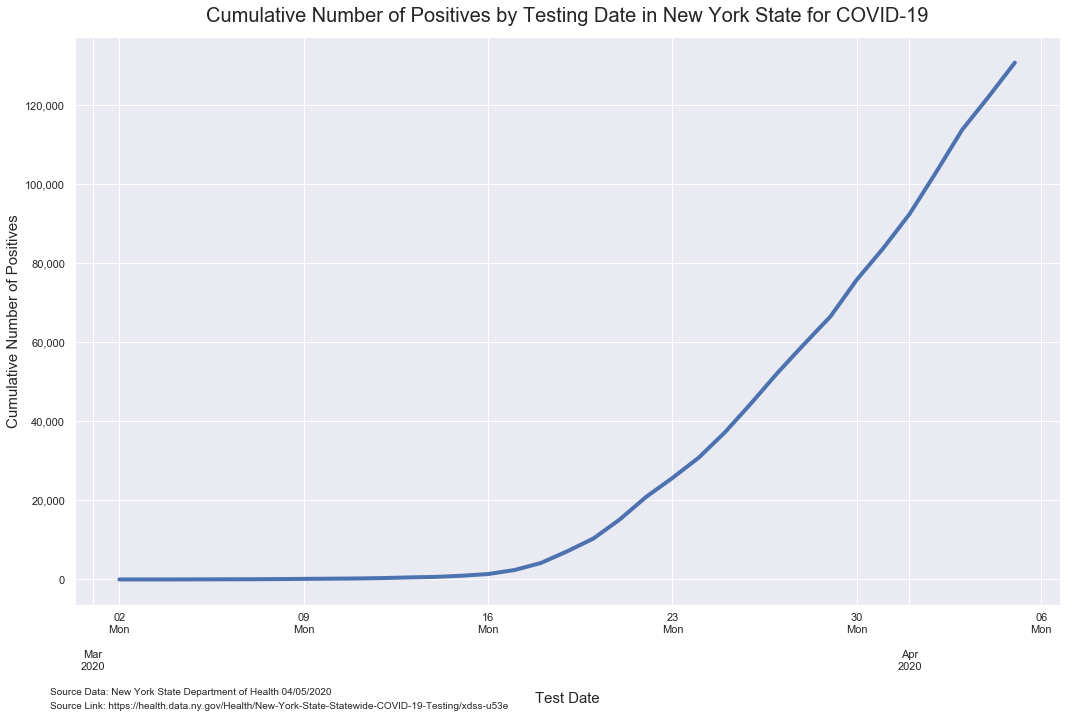

In [75]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             data=covid_19_nys_data_total, linewidth=4, ci=None)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives by Testing Date in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-nys')

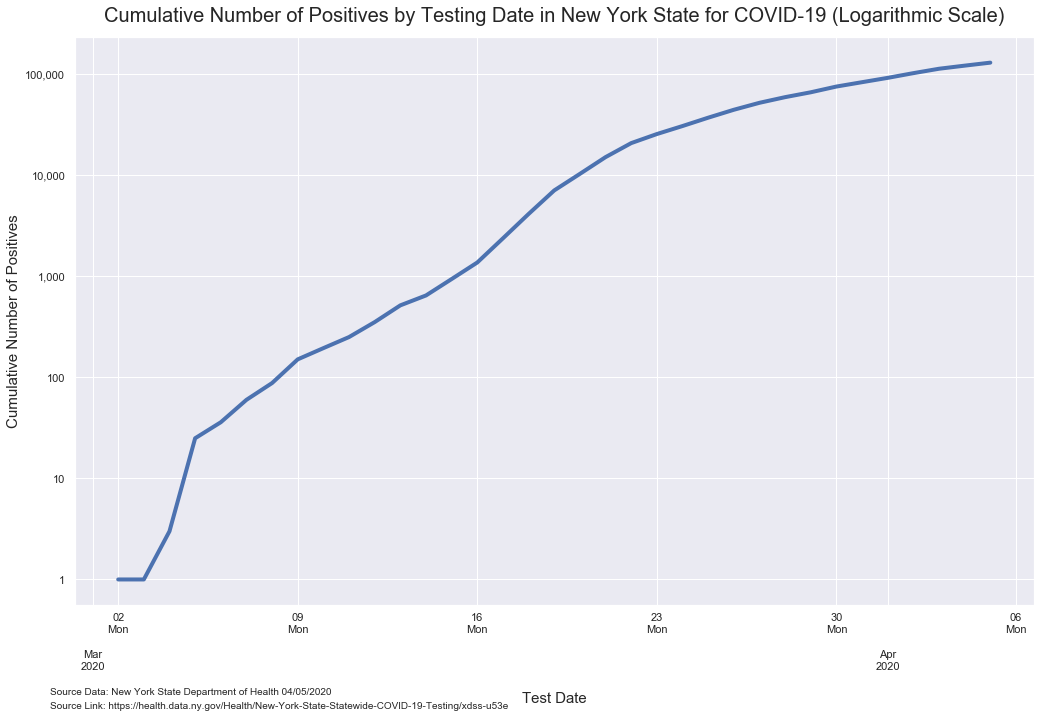

In [76]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             data=covid_19_nys_data_total, linewidth=4, ci=None)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives by Testing Date in New York State for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-nys-log')

In [77]:
bar_plot = covid_19_nys_data.sort_values(by = 'Test Date', 
                    ascending=False).drop_duplicates(
                    subset ="County", keep = 'first')

In [78]:
bar_plot = bar_plot.sort_values(by = 'Cumulative Number of Positives', ascending=True)

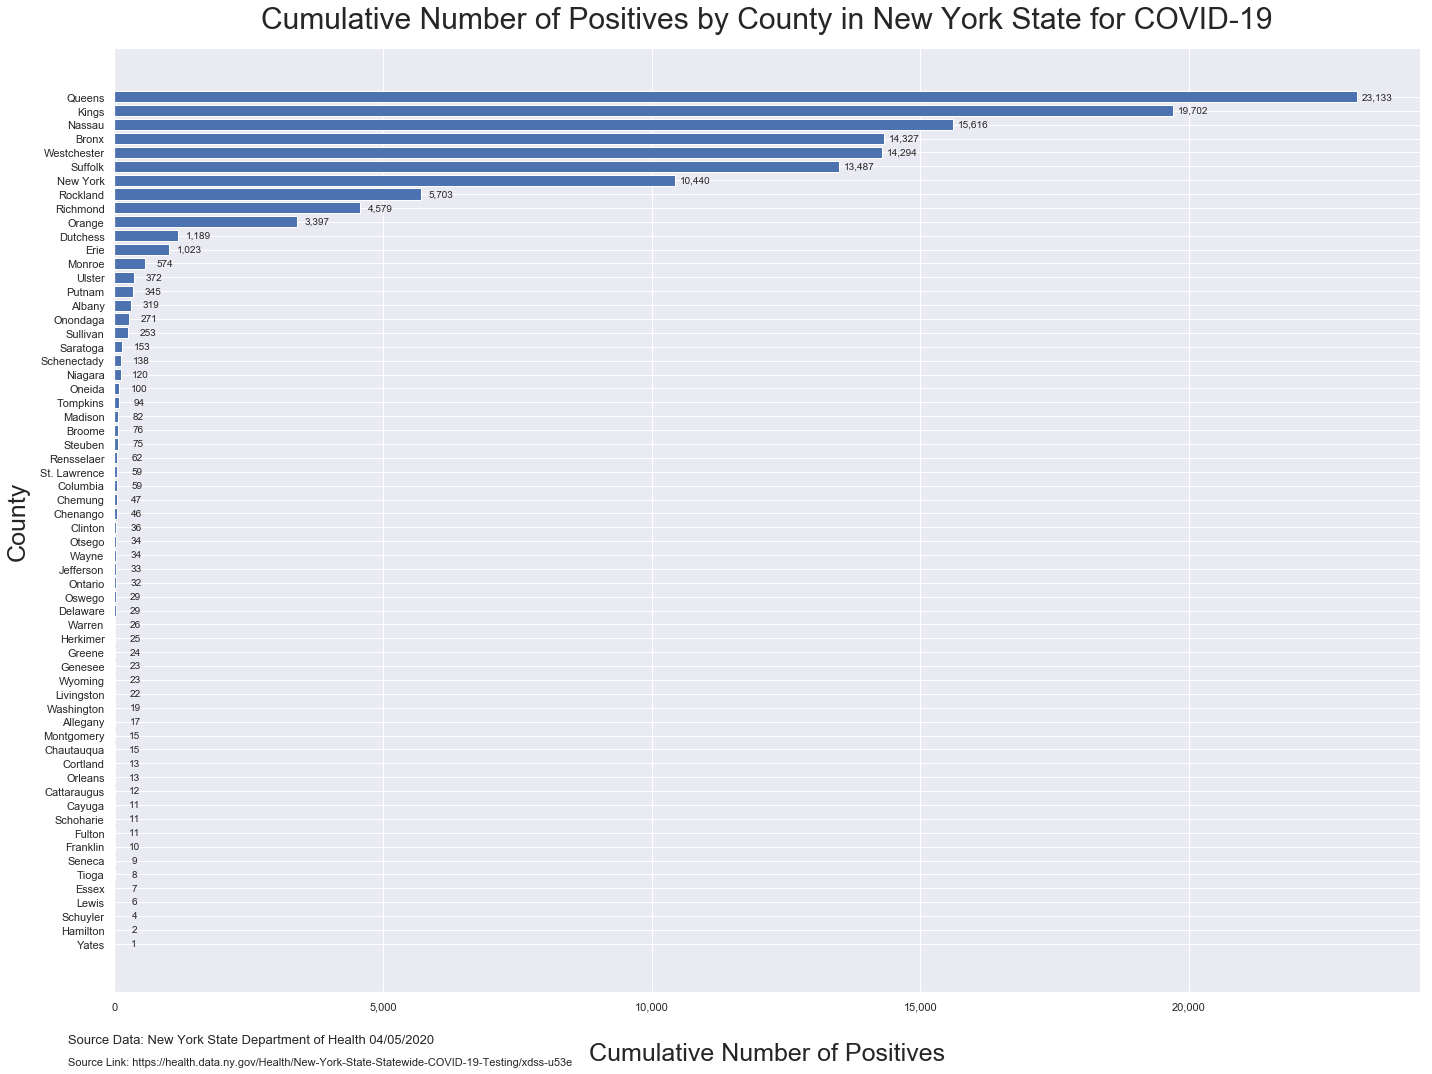

In [79]:
plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar_plot.County, bar_plot['Cumulative Number of Positives'])
plt.xlabel("Cumulative Number of Positives", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("County", labelpad=14, fontsize=25)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 10

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=11)

plt.title("Cumulative Number of Positives by County in New York State for COVID-19", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/cases-by-county-barh')

In [80]:
from_ten_cases_top_10

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date,days_from_10_cases
70,2020-04-05,Bronx,959,14327,1628,27371,2020-03-12,24
71,2020-04-04,Bronx,1053,13368,1778,25743,2020-03-12,23
72,2020-04-03,Bronx,1229,12315,2108,23965,2020-03-12,22
73,2020-04-02,Bronx,1159,11086,1946,21857,2020-03-12,21
74,2020-04-01,Bronx,1066,9927,1754,19911,2020-03-12,20
...,...,...,...,...,...,...,...,...
1882,2020-03-09,Westchester,42,102,222,592,2020-03-05,4
1883,2020-03-08,Westchester,18,60,207,370,2020-03-05,3
1884,2020-03-07,Westchester,22,42,110,163,2020-03-05,2
1885,2020-03-06,Westchester,0,20,9,53,2020-03-05,1


In [81]:
growth_rate = from_ten_cases_top_10.sort_values(by=['County', 'Test Date', 'Cumulative Number of Positives'], 
                                                ascending=[True, True, True])

In [82]:
growth_rate['growth_rate'] = (growth_rate['New Positives'] / growth_rate['New Positives'].shift(1))

In [83]:
growth_rate.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date,days_from_10_cases,growth_rate
94,2020-03-12,Bronx,3,10,36,190,2020-03-12,0,NaN
93,2020-03-13,Bronx,10,20,99,289,2020-03-12,1,3.333333
92,2020-03-14,Bronx,8,28,80,369,2020-03-12,2,0.800000
91,2020-03-15,Bronx,29,57,116,485,2020-03-12,3,3.625000
90,2020-03-16,Bronx,29,86,151,636,2020-03-12,4,1.000000


In [84]:
replace = growth_rate['growth_rate'].loc[growth_rate.growth_rate < 0.02]
growth_rate['growth_rate'] = growth_rate['growth_rate'].replace(replace,  np.NaN)

inf = [np.inf, -np.inf]
growth_rate['growth_rate'] = growth_rate['growth_rate'].replace(inf, np.nan)

In [85]:
growth_rate.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date,days_from_10_cases,growth_rate
94,2020-03-12,Bronx,3,10,36,190,2020-03-12,0,NaN
93,2020-03-13,Bronx,10,20,99,289,2020-03-12,1,3.333333
92,2020-03-14,Bronx,8,28,80,369,2020-03-12,2,0.800000
91,2020-03-15,Bronx,29,57,116,485,2020-03-12,3,3.625000
90,2020-03-16,Bronx,29,86,151,636,2020-03-12,4,1.000000


In [86]:
growth_rate = growth_rate.dropna(subset=['growth_rate'])

In [87]:
growth_rate.isna().sum()

Test Date                               0
County                                  0
New Positives                           0
Cumulative Number of Positives          0
Total Number of Tests Performed         0
Cumulative Number of Tests Performed    0
ten_cases_date                          0
days_from_10_cases                      0
growth_rate                             0
dtype: int64

In [88]:
growth_rate

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date,days_from_10_cases,growth_rate
93,2020-03-13,Bronx,10,20,99,289,2020-03-12,1,3.333333
92,2020-03-14,Bronx,8,28,80,369,2020-03-12,2,0.800000
91,2020-03-15,Bronx,29,57,116,485,2020-03-12,3,3.625000
90,2020-03-16,Bronx,29,86,151,636,2020-03-12,4,1.000000
89,2020-03-17,Bronx,123,209,433,1069,2020-03-12,5,4.241379
...,...,...,...,...,...,...,...,...,...
1859,2020-04-01,Westchester,884,11567,1891,39081,2020-03-05,27,1.234637
1858,2020-04-02,Westchester,784,12351,1632,40713,2020-03-05,28,0.886878
1857,2020-04-03,Westchester,730,13081,1621,42334,2020-03-05,29,0.931122
1856,2020-04-04,Westchester,642,13723,1621,43955,2020-03-05,30,0.879452


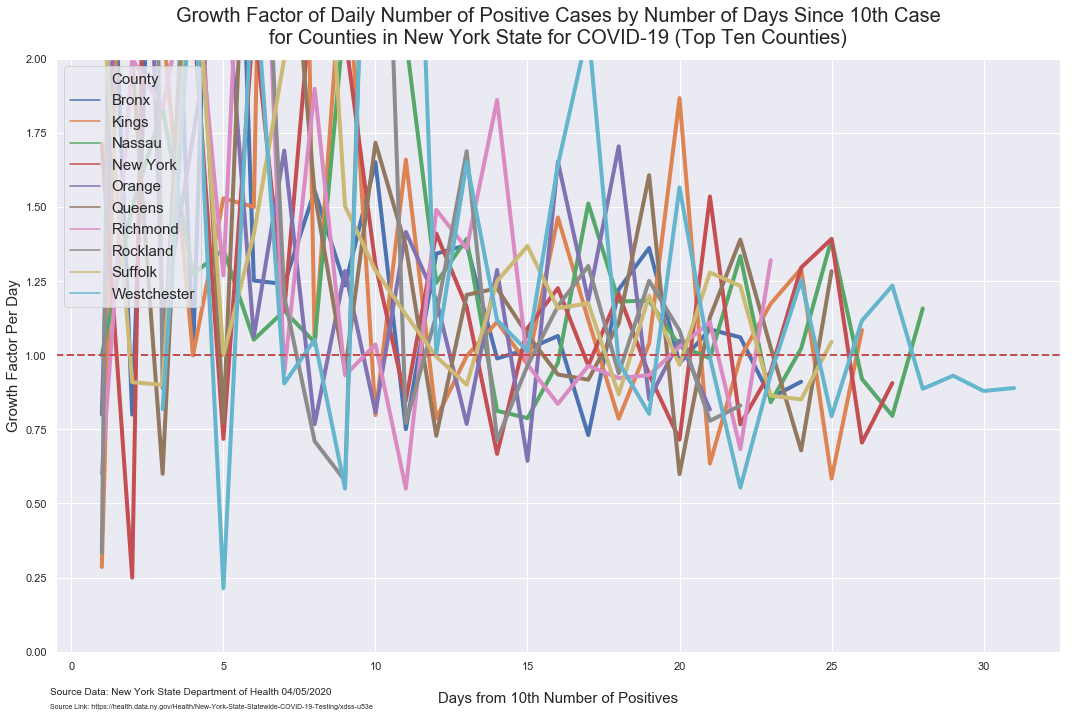

In [89]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="growth_rate",
             hue="County", data=growth_rate , linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0, 2)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/growth-factor-by-county-top-10')

In [90]:
growth_rate_weekly = growth_rate.set_index('Test Date').groupby('County').resample('W').agg({'days_from_10_cases': 
                                                                    np.max, 'growth_rate': np.mean})

In [91]:
growth_rate_weekly

days_from_10_cases  growth_rate
County      Test Date                                  
Bronx       2020-03-15                   3     2.586111
            2020-03-22                  10     1.739366
            2020-03-29                  17     1.038612
            2020-04-05                  24     1.067501
Kings       2020-03-15                   5     1.788025
            2020-03-22                  12     2.145196
            2020-03-29                  19     1.069778
            2020-04-05                  26     1.090069
Nassau      2020-03-15                   7     1.309405
            2020-03-22                  14     1.758028
            2020-03-29                  21     1.094516
            2020-04-05                  28     1.066269
New York    2020-03-15                   6     2.165293
            2020-03-22                  13     1.469841
            2020-03-29                  20     0.972363
            2020-04-05                  27     1.078276
Orange      2020-03-22                   7     1.864599
            2020-03-29                  14     1.074096
            2020-04-05                  21     1.129176
Queens      2020-03-15                   4     2.080556
            2020-03-22                  11     1.759744
            2020-03-29                  18     1.026767
            2020-04-05                  25     1.101763
Richmond    2020-03-15                   2     1.300000
            2020-03-22                   9     1.821780
            2020-03-29                  16     1.157488
            2020-04-05                  23     0.994985
Rockland    2020-03-15                   1     0.333333
            2020-03-22                   8     2.873373
            2020-03-29                  15     1.372693
            2020-04-05                  22     1.049928
Suffolk     2020-03-15                   4     1.613384
            2020-03-22                  11     1.635360
            2020-03-29                  18     1.102248
            2020-04-05                  25     1.063048
Westchester 2020-03-08                   3     0.818182
            2020-03-15                  10     1.587946
            2020-03-22                  17     1.766103
            2020-03-29                  24     1.011403
            2020-04-05                  31     0.961829

In [92]:
growth_rate_weekly.reset_index(inplace=True)
growth_rate_weekly.rename(columns={'growth_rate': 'growth_rate_weekly_average'}, inplace=True)

In [93]:
growth_rate_weekly

,County,Test Date,days_from_10_cases,growth_rate_weekly_average
0,Bronx,2020-03-15,3,2.586111
1,Bronx,2020-03-22,10,1.739366
2,Bronx,2020-03-29,17,1.038612
3,Bronx,2020-04-05,24,1.067501
4,Kings,2020-03-15,5,1.788025
5,Kings,2020-03-22,12,2.145196
6,Kings,2020-03-29,19,1.069778
7,Kings,2020-04-05,26,1.090069
8,Nassau,2020-03-15,7,1.309405
9,Nassau,2020-03-22,14,1.758028


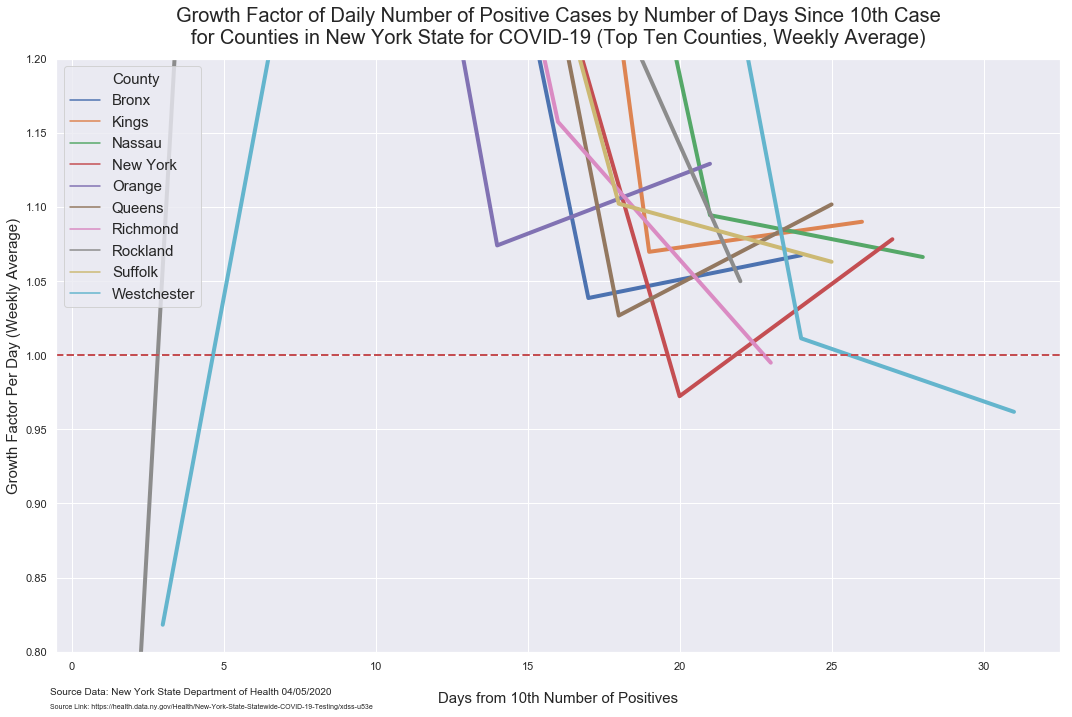

In [94]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="growth_rate_weekly_average",
             hue="County", data=growth_rate_weekly, linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0.8, 1.2)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day (Weekly Average)', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/growth-factor-by-county-top-10-weekly')